In [40]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf
from dask.diagnostics import ProgressBar
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
def contour_plot(ds,region,title,cmap,borders=False,label='Frequency'):
    # Specify projection
    crs = ccrs.PlateCarree()

    # Create figure and axes
    fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs})

    # Specify variables
    
    # Rework longitudes to avoid 360-O jump
    X = ds['lon'].values
    X[1:]+=np.cumsum(np.diff(ds['lon']) < -180) * 360
    Y = ds['lat']
    Z = ds.squeeze()
    Z, X = add_cyclic_point(Z,coord=X)

    # Create contour plot of SST
    im = ax.contourf(X,Y,Z,levels=10,transform=crs,cmap=cmap)
    # Add grid lines, coastlines
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.left_labels = False
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN,zorder=10,facecolor='lightskyblue')
    
    if region != 'Global':
        xmin = mf.masks[region][0][0]
        if xmin > 180:
            xmin -= 360
        xmax = mf.masks[region][0][-1]
        if xmax > 180:
            xmax -= 360
        ymin = mf.masks[region][1][0]
        ymax = mf.masks[region][1][-1]
        ax.set_extent([xmin,xmax,ymin,ymax],crs=crs)
    
    # Add national boundaries
    if borders:
        ax.add_feature(cfeature.BORDERS.with_scale('50m'),edgecolor='silver')

    # Set colorbar, title
    cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05)
    cbar.set_label(label,fontsize=12)
    plt.title(title)
    plt.savefig(region+'freq.png')

In [18]:
region = 'India'

ds = xr.open_mfdataset('../data/processed/WBTyearly/WBT209*.nc',combine='nested',concat_dim='year',chunks={'lon':6,'lat':6})
ds_region = mf.slice_region(ds,region)

# Days greater than heat stress threshold
ds_frac = (ds_region.sel(WBT_bin=slice(27.9,None)).sum(['ensemble','WBT_bin']))/1825
ds_frac = ds_frac.mean(dim='year')

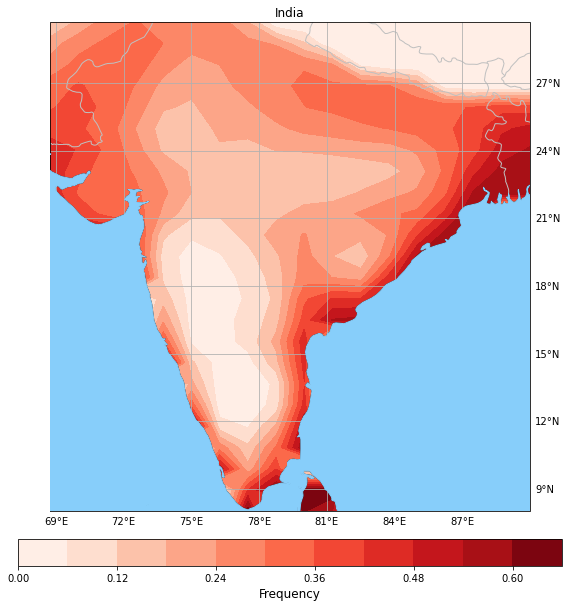

In [25]:
mf.contour_plot(ds_frac['histogram_WBT'],'India','India','Reds',borders=True,label='Frequency')

In [31]:
region = 'Southeast Asia'

[########################################] | 100% Completed | 28.9s
[########################################] | 100% Completed |  0.3s


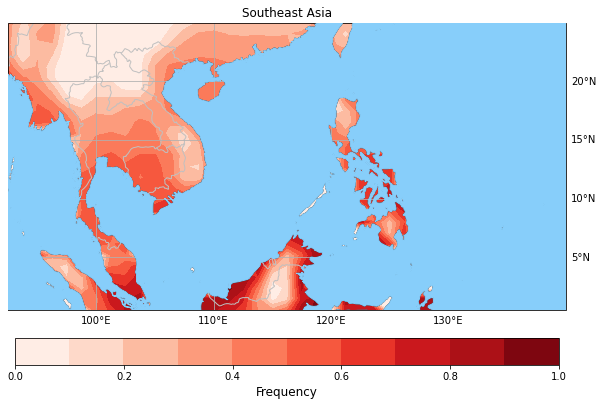

In [32]:
ds = xr.open_mfdataset('../data/processed/WBTyearly/WBT209*.nc',combine='nested',concat_dim='year',chunks={'lon':10,'lat':10})
ds_region = mf.slice_region(ds,region)
# Days greater than heat stress threshold
ds_frac = (ds_region.sel(WBT_bin=slice(27.9,None)).sum(['ensemble','WBT_bin']))/1825
ds_frac = ds_frac.mean(dim='year')

with ProgressBar():
    mf.contour_plot(ds_frac['histogram_WBT'],region,region,'Reds',borders=True,label='Frequency')

[########################################] | 100% Completed |  1.3s
[########################################] | 100% Completed |  0.3s


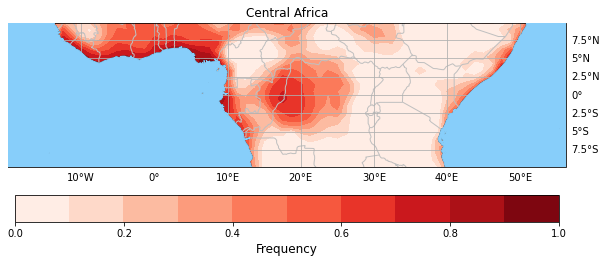

In [61]:
region = 'Central Africa'

ds = xr.open_mfdataset('../data/processed/WBTyearly/WBT209*.nc',combine='nested',concat_dim='year',chunks={'lon':10,'lat':10})
ds_region = mf.slice_region(ds,region)
# Days greater than heat stress threshold
ds_frac = (ds_region.sel(WBT_bin=slice(27.9,None)).sum(['ensemble','WBT_bin']))/1825
ds_frac = ds_frac.mean(dim='year')

with ProgressBar():
    contour_plot(ds_frac['histogram_WBT'],region,region,'Reds',borders=True,label='Frequency')

[########################################] | 100% Completed | 19.6s
[########################################] | 100% Completed |  0.2s


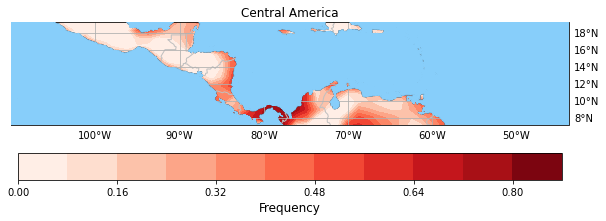

In [62]:
region = 'Central America'

ds = xr.open_mfdataset('../data/processed/WBTyearly/WBT209*.nc',combine='nested',concat_dim='year',chunks={'lon':5,'lat':5})
ds_region = mf.slice_region(ds,region)
# Days greater than heat stress threshold
ds_frac = (ds_region.sel(WBT_bin=slice(27.9,None)).sum(['ensemble','WBT_bin']))/1825
ds_frac = ds_frac.mean(dim='year')

with ProgressBar():
    contour_plot(ds_frac['histogram_WBT'],region,region,'Reds',borders=True,label='Frequency')

[########################################] | 100% Completed |  4.3s
[########################################] | 100% Completed |  0.4s


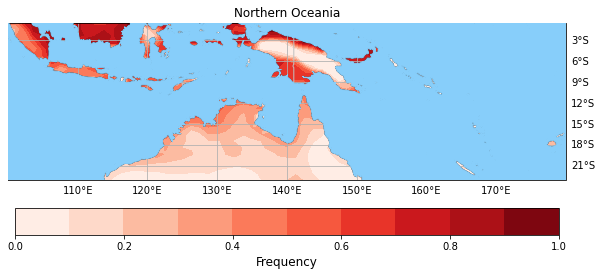

In [68]:
region = 'Northern Oceania'

ds = xr.open_mfdataset('../data/processed/WBTyearly/WBT209*.nc',combine='nested',concat_dim='year',chunks={'lon':5,'lat':5})
ds_region = mf.slice_region(ds,region)
# Days greater than heat stress threshold
ds_frac = (ds_region.sel(WBT_bin=slice(27.9,None)).sum(['ensemble','WBT_bin']))/1825
ds_frac = ds_frac.mean(dim='year')

with ProgressBar():
    contour_plot(ds_frac['histogram_WBT'],region,region,'Reds',borders=True,label='Frequency')

[########################################] | 100% Completed | 36.3s
[########################################] | 100% Completed |  0.3s


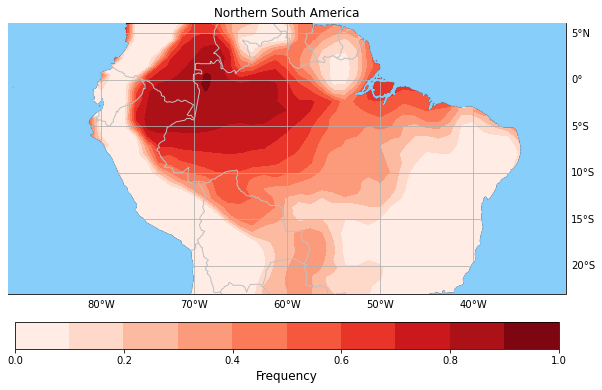

In [69]:
region = 'Northern South America'

ds = xr.open_mfdataset('../data/processed/WBTyearly/WBT209*.nc',combine='nested',concat_dim='year',chunks={'lon':10,'lat':10})
ds_region = mf.slice_region(ds,region)
# Days greater than heat stress threshold
ds_frac = (ds_region.sel(WBT_bin=slice(27.9,None)).sum(['ensemble','WBT_bin']))/1825
ds_frac = ds_frac.mean(dim='year')

with ProgressBar():
    contour_plot(ds_frac['histogram_WBT'],region,region,'Reds',borders=True,label='Frequency')